In [15]:
import torch
from torch import nn
from torchvision.datasets import FashionMNIST
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim.lr_scheduler import StepLR
import math
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Normalize, Compose

In [16]:
# Hyper-parameter
epochs = 20
batch_size = 256

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
transform = Compose([ToTensor(), Normalize(0, 1)])

In [19]:
train_data = FashionMNIST('data', train=True, transform=transform, download=True)
test_data = FashionMNIST('data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=batch_size, pin_memory=True, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, pin_memory=True, shuffle=False)

In [20]:
class Module(nn.Module):
    def __init__(self):
        super(Module, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, (3, 3), padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(64),
            
            nn.Conv2d(64, 32, (3, 3), padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(32),
            
            nn.Conv2d(32, 16, (3, 3), padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(16),
            
            nn.Flatten(),
            
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.LazyLinear(10)
        )
    def forward(self, X):
        return self.net(X)

In [ ]:
model = Module(); model.to(device)
optimizer = Adam(model.parameters(), 0.000)
loss = CrossEntropyLoss()
# scheduler = StepLR(optimizer, 5, math.exp(-0.1))

In [22]:
from torchsummary import summary
summary(model, (1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]             640
              ReLU-2           [-1, 64, 26, 26]               0
         MaxPool2d-3           [-1, 64, 13, 13]               0
       BatchNorm2d-4           [-1, 64, 13, 13]             128
            Conv2d-5           [-1, 32, 11, 11]          18,464
              ReLU-6           [-1, 32, 11, 11]               0
         MaxPool2d-7             [-1, 32, 5, 5]               0
       BatchNorm2d-8             [-1, 32, 5, 5]              64
            Conv2d-9             [-1, 16, 3, 3]           4,624
             ReLU-10             [-1, 16, 3, 3]               0
        MaxPool2d-11             [-1, 16, 1, 1]               0
      BatchNorm2d-12             [-1, 16, 1, 1]              32
          Flatten-13                   [-1, 16]               0
           Linear-14                  [

In [23]:
history = {
    'acc':[],
    'loss':[],
    'val_acc':[],
    'val_loss':[]
}

In [24]:
for i in range(epochs):
    print('\033[33m' + f'Epoch {i + 1} Start' + '\33[0m')
    
    # Start Training
    train_acc = 0
    train_loss = 0
    
    model.train()
    for data in train_loader:
        img, label = data
        img, label = img.to(device), label.to(device)
        
        output = model(img)
        output_loss = loss(output, label)
        # Calculate
        train_acc += (output.argmax(dim=1) == label).sum().item()
        train_loss += output_loss.item()
        # BP
        output_loss.backward()
        optimizer.step()
    # scheduler.step()
    train_acc = train_acc / len(train_data)
    train_loss /= len(train_loader)
    
    # Start Valuation
    test_acc = 0
    test_loss = 0
    
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            img, label = data
            img, label = img.to(device), label.to(device)
            
            output = model(img)
            output_loss = loss(output, label)
            # Calculate
            test_acc += (output.argmax(dim=1) == label).sum().item()
            test_loss += output_loss.item()
    test_acc = test_acc / len(test_data)
    test_loss /= len(test_loader)
    
    history['acc'].append(train_acc)
    history['loss'].append(train_loss)
    history['val_acc'].append(test_acc)
    history['val_loss'].append(test_loss)
    
    print(f'Train acc: {train_acc:.4f}, loss: {train_loss:.4f}')
    print(f'Test acc: {test_acc:.4f}, loss: {test_loss:.4f}')
    print('======================================')

Epoch 1 Start
Train acc: 0.4159, loss: 1.7494
Test acc: 0.6266, loss: 1.0563
Epoch 2 Start
Train acc: 0.6434, loss: 0.9599
Test acc: 0.7480, loss: 0.7233
Epoch 3 Start
Train acc: 0.7184, loss: 0.8152
Test acc: 0.7633, loss: 0.6768
Epoch 4 Start
Train acc: 0.7398, loss: 0.7202
Test acc: 0.7712, loss: 0.6137
Epoch 5 Start
Train acc: 0.7588, loss: 0.6916
Test acc: 0.7843, loss: 0.5899
Epoch 6 Start
Train acc: 0.7607, loss: 0.6540
Test acc: 0.7904, loss: 0.5597
Epoch 7 Start
Train acc: 0.7792, loss: 0.6270
Test acc: 0.7991, loss: 0.5518
Epoch 8 Start
Train acc: 0.7828, loss: 0.6119
Test acc: 0.8011, loss: 0.5410
Epoch 9 Start
Train acc: 0.7914, loss: 0.5976
Test acc: 0.8075, loss: 0.5226
Epoch 10 Start
Train acc: 0.7983, loss: 0.5735
Test acc: 0.8034, loss: 0.5316
Epoch 11 Start
Train acc: 0.7981, loss: 0.5589
Test acc: 0.8182, loss: 0.5019
Epoch 12 Start
Train acc: 0.8055, loss: 0.5523
Test acc: 0.8152, loss: 0.5030
Epoch 13 Start
Train acc: 0.8077, loss: 0.5384
Test acc: 0.8198, loss: 0.

In [25]:
print('pred outcome', round(max(history['val_acc']), 4))

pred outcome 0.8351


In [26]:
def show(history:dict, name):
    plt.cla(); plt.clf()
    plt.plot(history[name], 'b', label='train')
    plt.plot(history['val_'+name], 'r', label='val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    plt.title('Performance')
    plt.show()

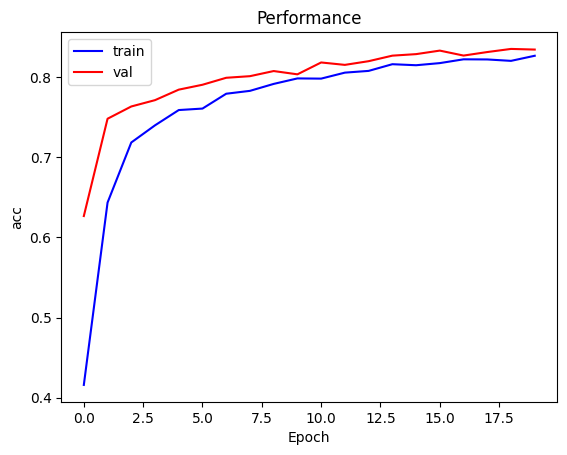

In [27]:
show(history, 'acc')

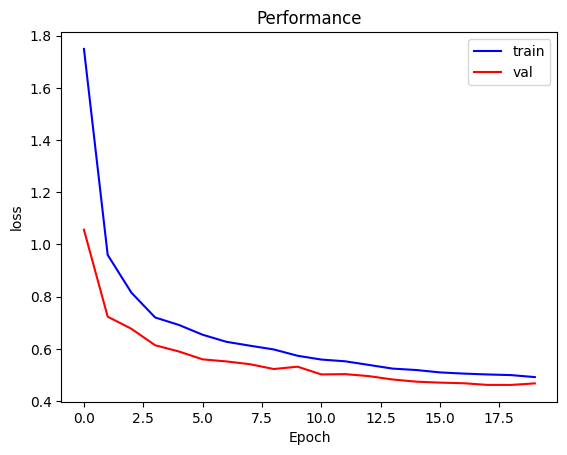

In [28]:
show(history, 'loss')